In [1]:
# Han Lee
# CSC 2730

%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

url = 'https://raw.githubusercontent.com/sunlee115/csc2730project/main/forestfires.csv'
df = pd.read_csv(url)

df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df=df.drop(['X','Y','day'], axis=1)

df.head(5)

Populating the interactive namespace from numpy and matplotlib


,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,3,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [2]:
#Identify the outliers 
df.loc[df['area'] > 200]

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
236,9,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94
237,9,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,9,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


In [3]:
#Drop the outliers from the dataframe 
df.drop(
    labels=[238,415],
    axis=0,
    inplace=True
)

In [4]:
df.describe()

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,7.471845,90.633010,110.635922,547.401942,9.013010,18.860388,44.355340,4.015922,0.021748,9.329961
std,2.279302,5.527184,63.980106,248.396286,4.563223,5.798962,16.313441,1.794712,0.296531,27.350635
min,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,7.000000,90.200000,65.450000,435.500000,6.450000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,8.000000,91.600000,108.300000,661.800000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,9.000000,92.900000,141.850000,713.900000,10.750000,22.800000,53.000000,4.900000,0.000000,6.490000
max,12.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,278.530000


In [5]:
#Find highest and lowest correlation
print('Correlation with Area \n' + str(df.corr()['area']))

Correlation with Area 
month    0.068309
FFMC     0.028390
DMC      0.067048
DC       0.044267
ISI     -0.029655
temp     0.068676
RH      -0.039408
wind     0.003710
rain    -0.007727
area     1.000000
Name: area, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb05b82c710>,
      dtype=object)

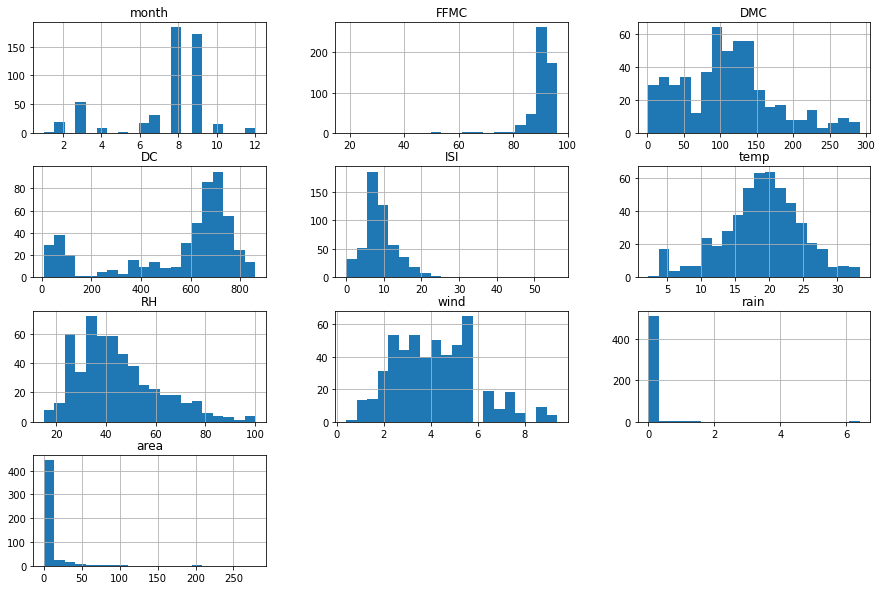

In [6]:
#Visualize all the attributes
df.hist(bins=20,figsize=(15,10))

Text(170, 450, 'max is: 278.53')

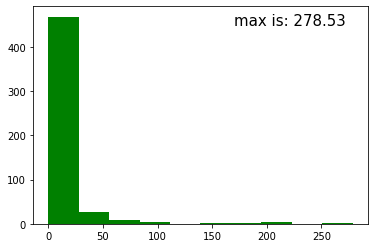

In [7]:
#Visualize area specifically and identify max area
plt.hist(df.area, color='green')
plt.text(170, 450, 'max is: ' + str(df.area.max()), size=15)

In [8]:
#Convert from dataframe to numpy array and set up variables
data = df.to_numpy()

month = data[:,0]
FFMC = data[:,1]
DMC = data[:,2]
DC = data[:,3]
ISI = data[:,4]
temp = data[:,5]
RH = data[:,6]
wind = data[:,7]
rain = data[:,8]
area = data[:,9]

X=data[:,0:9]
Y=data[:,9]

MSE = 743.1210019996515
Slope: [0.8196739]


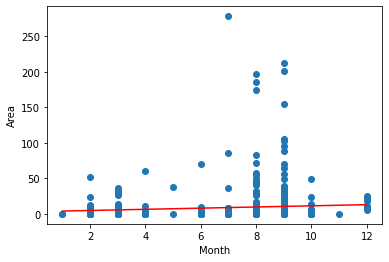

In [9]:
# Graph of Month and Area
model = LinearRegression(fit_intercept=True)
model.fit(month[:, None], area)

yp = model.predict(month[:, None])
scatter(month, area)
xfit = np.linspace(1,12)
yfit = model.predict(xfit[:, None])
plot(xfit, yfit, 'r')
plt.xlabel('Month')
plt.ylabel('Area')

#MSE = mean squared error
print('MSE =', mean_squared_error(Y,yp))
print('Slope: ' + str(model.coef_))

MSE = 746.0029682678808
Slope: [0.14048289]


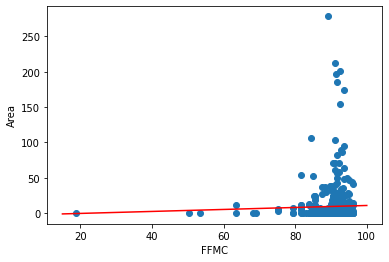

In [10]:
# FFMC and Area

model = LinearRegression(fit_intercept=True)
model.fit(FFMC[:, None], area)

yp = model.predict(FFMC[:, None])
scatter(FFMC, area)
xfit = np.linspace(15,100)
yfit = model.predict(xfit[:, None])
plot(xfit, yfit, 'r')
plt.xlabel('FFMC')
plt.ylabel('Area')

print('MSE =', mean_squared_error(Y,yp))
print('Slope: ' + str(model.coef_))

MSE = 743.2483863710979
Slope: [0.02866217]


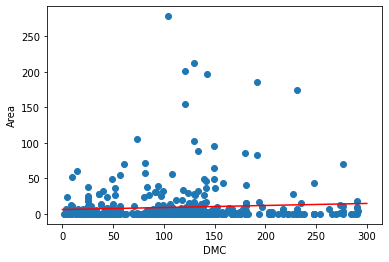

In [11]:
# DMC and Area

model = LinearRegression(fit_intercept=True)
model.fit(DMC[:, None], area)

yp = model.predict(DMC[:, None])
scatter(DMC, area)
xfit = np.linspace(0,300)
yfit = model.predict(xfit[:, None])
plot(xfit, yfit, 'r')
plt.xlabel('DMC')
plt.ylabel('Area')

print('MSE =', mean_squared_error(Y,yp))
print('Slope: ' + str(model.coef_))

MSE = 745.1416672743895
Slope: [0.00487422]


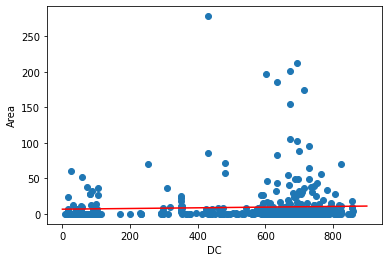

In [12]:
# DC and Area

model = LinearRegression(fit_intercept=True)
model.fit(DC[:, None], area)

yp = model.predict(DC[:, None])
scatter(DC, area)
xfit = np.linspace(0,900)
yfit = model.predict(xfit[:, None])
plot(xfit, yfit, 'r')
plt.xlabel('DC')
plt.ylabel('Area')

print('MSE =', mean_squared_error(Y,yp))
print('Slope: ' + str(model.coef_))

MSE = 745.9481507830296
Slope: [-0.17774098]


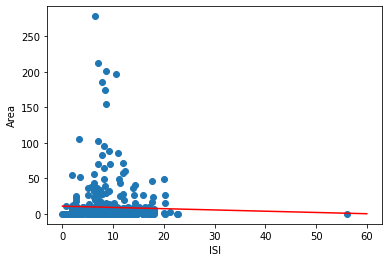

In [13]:
# ISI and Area

model = LinearRegression(fit_intercept=True)
model.fit(ISI[:, None], area)

yp = model.predict(ISI[:, None])
scatter(ISI, area)
xfit = np.linspace(0,60)
yfit = model.predict(xfit[:, None])
plot(xfit, yfit, 'r')
plt.xlabel('ISI')
plt.ylabel('Area')

print('MSE =', mean_squared_error(Y,yp))
print('Slope: ' + str(model.coef_))

MSE = 743.0834580592666
Slope: [0.32390703]


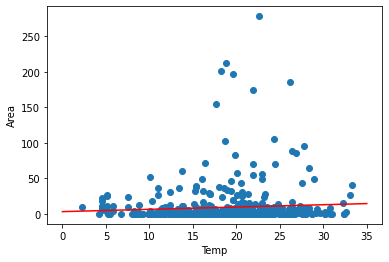

In [14]:
# Temp and Area

model = LinearRegression(fit_intercept=True)
model.fit(temp[:, None], area)

yp = model.predict(temp[:, None])
scatter(temp, area)
xfit = np.linspace(0,35)
yfit = model.predict(xfit[:, None])
plot(xfit, yfit, 'r')
plt.xlabel('Temp')
plt.ylabel('Area')

print('MSE =', mean_squared_error(Y,yp))
print('Slope: ' + str(model.coef_))

MSE = 745.4452306358706
Slope: [-0.06607058]


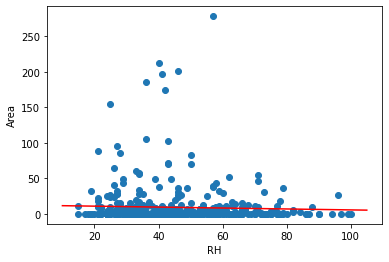

In [15]:
# RH and Area

model = LinearRegression(fit_intercept=True)
model.fit(RH[:, None], area)

yp = model.predict(RH[:, None])
scatter(RH, area)
xfit = np.linspace(10,105)
yfit = model.predict(xfit[:, None])
plot(xfit, yfit, 'r')
plt.xlabel('RH')
plt.ylabel('Area')

print('MSE =', mean_squared_error(Y,yp))
print('Slope: ' + str(model.coef_))

MSE = 746.594431858591
Slope: [0.05654561]


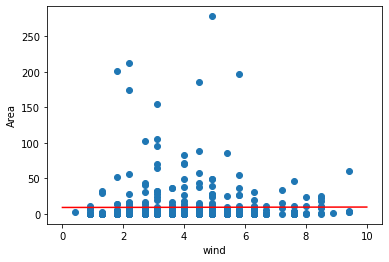

In [16]:
# wind and Area

model = LinearRegression(fit_intercept=True)
model.fit(wind[:, None], area)

yp = model.predict(wind[:, None])
scatter(wind, area)
xfit = np.linspace(0,10)
yfit = model.predict(xfit[:, None])
plot(xfit, yfit, 'r')
plt.xlabel('wind')
plt.ylabel('Area')

print('MSE =', mean_squared_error(Y,yp))
print('Slope: ' + str(model.coef_))

MSE = 746.5601390614528
Slope: [-0.71265733]


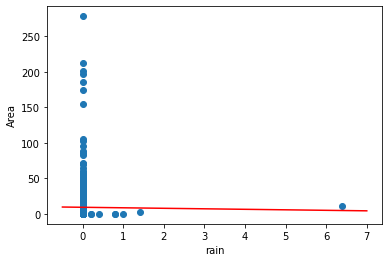

In [17]:
# rain and Area

model = LinearRegression(fit_intercept=True)
model.fit(rain[:, None], area)

yp = model.predict(rain[:, None])
scatter(rain, area)
xfit = np.linspace(-.5,7)
yfit = model.predict(xfit[:, None])
plot(xfit, yfit, 'r')
plt.xlabel('rain')
plt.ylabel('Area')

print('MSE =', mean_squared_error(data[:,9],yp))
print('Slope: ' + str(model.coef_))

In [18]:
#Analyzing other models (RandomForest & ExtraTreesRegressor)
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import explained_variance_score

models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))

for name, model in models:
    model.fit(X, Y)
    p = model.predict(X)
    score = explained_variance_score(Y, p)
    mse = mean_squared_error(p, Y)
    
    final = "%s \n     Score:%f; MSE:%f\n" % (name, score, mse)
    print(final)

LinearRegression 
     Score:0.020378; MSE:731.390087

RandomForestRegressor 
     Score:0.853305; MSE:110.416744

ExtraTreesRegressor 
     Score:0.984253; MSE:11.756586

